In [3]:
import librosa, librosa.display
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.metrics import classification_report

In [4]:
'''path = "audio_cnn/"
min_samples = 22050

waveforms = []
ffts = []
stfts = [] 
f_ffts = []
log_specs = []
MFCCs_list = []


def extract_MFCCs(signal, sample_rate):
    waveforms.append([signal, sample_rate]) 
    # FFT -> power spectrum
    # perform Fourier transform
    fft = np.fft.fft(signal)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sample_rate, len(magnitude))
    f_ffts.append([frequency, magnitude])
    
    # calculate abs values on complex numbers to get magnitude
    spectrum = np.abs(fft)
    
    # half frequency variable
    f = np.linspace(0, sample_rate, len(spectrum))
    left_spectrum = spectrum[:int(len(spectrum)/2)]
    left_f = f[:int(len(spectrum)/2)]
    
    ffts.append([left_f, left_spectrum])
    
    num_mfcc=13 
    n_fft=2048
    hop_length=512
    
    #performing Short-time FT
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    spectrogram = np.abs(stft)
    
    stfts.append([spectrogram, sample_rate, hop_length])
    
    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    
    log_specs.append([log_spectrogram, sample_rate, hop_length])
    
    MFCCs = librosa.feature.mfcc(signal, sample_rate, 
                                 n_mfcc=num_mfcc, n_fft=n_fft,
                                 hop_length=hop_length)
    MFCCs_list.append([MFCCs, sample_rate, hop_length])
    return MFCCs



def preprocess_dataset(dataset_path):
    data = {
        "mapping": [],
        "labels": [],
        "MFCCs": [],
        "files": []
    } 
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        if dirpath is not dataset_path:
            label = dirpath.split("/")[-1]
            data["mapping"].append(label)
            print("\nProcessing: '{}'".format(label))

            # process all audio files in sub-dir and store MFCCs
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path)
                if len(signal) >= min_samples:

                    signal = signal[:min_samples]

                    MFCCs = extract_MFCCs(signal, sample_rate)
                    if label == 'Drone':
                        llabel = 1
                    else:
                        llabel = 0

                    data["MFCCs"].append(MFCCs.T.tolist())
                    data["labels"].append(llabel)
                    data["files"].append(file_path)
                    print("{}: {}".format(file_path, i-1))
                    
    return data

df = preprocess_dataset(path)'''
print("Commented")

Commented


In [5]:
mfcc = np.array(df["MFCCs"])
labels = np.array(df["labels"])

NameError: name 'df' is not defined

In [ ]:
data = list(df.items())
an_array = np.array(data)
np.save('dataset.npy', an_array)

In [6]:
dataset_ = np.load('dataset.npy', allow_pickle = True)

In [7]:
labels = np.array(dataset_[1][1])
mfcc = np.array(dataset_[2][1])
test_X = mfcc[:12]
mfcc = mfcc[12:]
test_y = labels[:12]
labels = labels[12:]
print(mfcc.shape)
print(labels.shape)
print(test_X.shape)
print(test_y.shape)

(166, 44, 13)
(166,)
(12, 44, 13)
(12,)


In [8]:
mfcc.shape

(166, 44, 13)

In [9]:
unique, counts = np.unique(labels, return_counts=True)
unique, counts

(array([0, 1]), array([89, 77], dtype=int64))

In [10]:
classes = np.unique(labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


In [11]:
train_X = mfcc.reshape(-1, 44, 13, 1)
test_X = test_X.reshape(-1, 44, 13, 1)
train_X.shape

(166, 44, 13, 1)

In [12]:
train_Y_one_hot = to_categorical(labels)
test_y_one_hot = to_categorical(test_y)

In [53]:
test_y_one_hot.shape

(12, 2)

In [14]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=42)

In [15]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((132, 44, 13, 1), (34, 44, 13, 1), (132, 2), (34, 2))

In [33]:
batch_size = 64
epochs = 30
num_classes = 2

In [34]:
model_ = Sequential()
model_.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(44,13,1),padding='same'))
model_.add(LeakyReLU(alpha=0.1))
model_.add(MaxPooling2D((2, 2),padding='same'))
model_.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model_.add(LeakyReLU(alpha=0.1))
model_.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model_.add(LeakyReLU(alpha=0.1))                  
model_.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_.add(Flatten())
model_.add(Dense(128, activation='linear'))
model_.add(LeakyReLU(alpha=0.1))                  
model_.add(Dense(num_classes, activation='softmax'))

In [35]:
model_.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [36]:
model_.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 44, 13, 32)        320       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 44, 13, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 7, 32)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 7, 64)         18496     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 22, 7, 64)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 4, 64)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 4, 128)       

In [37]:
lfo_train = model_.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/30
3/3 [==============================] - ETA: 3s - loss: 6.9482 - accuracy: 0.42 - ETA: 0s - loss: 29.3168 - accuracy: 0.468 - 3s 379ms/step - loss: 28.4284 - accuracy: 0.4848 - val_loss: 35.3193 - val_accuracy: 0.4706
Epoch 2/30
3/3 [==============================] - ETA: 0s - loss: 25.6365 - accuracy: 0.593 - ETA: 0s - loss: 20.9524 - accuracy: 0.554 - 0s 141ms/step - loss: 20.3633 - accuracy: 0.5530 - val_loss: 9.5355 - val_accuracy: 0.5294
Epoch 3/30
3/3 [==============================] - ETA: 0s - loss: 12.2661 - accuracy: 0.375 - ETA: 0s - loss: 11.4965 - accuracy: 0.437 - 0s 130ms/step - loss: 11.2274 - accuracy: 0.4470 - val_loss: 4.7014 - val_accuracy: 0.5294
Epoch 4/30
3/3 [==============================] - ETA: 0s - loss: 5.4735 - accuracy: 0.43 - ETA: 0s - loss: 3.4992 - accuracy: 0.53 - 0s 119ms/step - loss: 3.4139 - accuracy: 0.5379 - val_loss: 3.9156 - val_accuracy: 0.4706
Epoch 5/30
3/3 [==============================] - ETA: 0s - loss: 2.9363 - accuracy: 0.54 

In [54]:
test_X.shape
test_y_one_hot.shape

(12, 2)

In [55]:
test_eval = model_.evaluate(test_X, test_y_one_hot, verbose=0)

In [56]:
test_eval

[0.4156070649623871, 1.0]

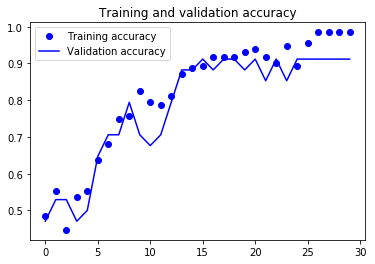

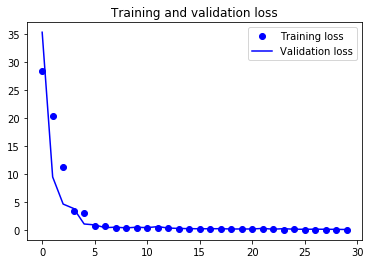

In [57]:
accuracy = lfo_train.history['accuracy']
val_accuracy = lfo_train.history['val_accuracy']
loss = lfo_train.history['loss']
val_loss = lfo_train.history['val_loss']
epochss = range(len(accuracy))
plt.plot(epochss, accuracy, 'bo', label='Training accuracy')
plt.plot(epochss, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochss, loss, 'bo', label='Training loss')
plt.plot(epochss, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [58]:
#adding dropout layer
model_ = Sequential()
model_.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(44,13,1)))
model_.add(LeakyReLU(alpha=0.1))
model_.add(MaxPooling2D((2, 2),padding='same'))
model_.add(Dropout(0.25))
model_.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model_.add(LeakyReLU(alpha=0.1))
model_.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_.add(Dropout(0.25))
model_.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model_.add(LeakyReLU(alpha=0.1))                  
model_.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_.add(Dropout(0.4))
model_.add(Flatten())
model_.add(Dense(128, activation='linear'))
model_.add(LeakyReLU(alpha=0.1))           
model_.add(Dropout(0.3))
model_.add(Dense(num_classes, activation='softmax'))

In [60]:
model_.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [61]:
lfo_train_dropout = model_.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/30
3/3 [==============================] - ETA: 3s - loss: 10.8951 - accuracy: 0.562 - ETA: 0s - loss: 42.9363 - accuracy: 0.531 - 3s 555ms/step - loss: 43.5207 - accuracy: 0.5227 - val_loss: 1.6950 - val_accuracy: 0.5882
Epoch 2/30
3/3 [==============================] - ETA: 0s - loss: 10.9203 - accuracy: 0.421 - ETA: 0s - loss: 16.1895 - accuracy: 0.445 - 1s 209ms/step - loss: 15.9128 - accuracy: 0.4545 - val_loss: 7.5223 - val_accuracy: 0.5294
Epoch 3/30
3/3 [==============================] - ETA: 0s - loss: 15.6288 - accuracy: 0.515 - ETA: 0s - loss: 15.1998 - accuracy: 0.453 - 1s 169ms/step - loss: 15.0531 - accuracy: 0.4470 - val_loss: 2.2379 - val_accuracy: 0.4706
Epoch 4/30
3/3 [==============================] - ETA: 0s - loss: 4.1744 - accuracy: 0.51 - ETA: 0s - loss: 5.6177 - accuracy: 0.50 - 1s 151ms/step - loss: 5.6528 - accuracy: 0.5152 - val_loss: 6.6261 - val_accuracy: 0.4706
Epoch 5/30
3/3 [==============================] - ETA: 0s - loss: 8.0825 - accuracy: 0.59

In [62]:
test_eval = model_.evaluate(test_X, test_y_one_hot, verbose=1)

1/1 [==============================] - ETA: 0s - loss: 0.3790 - accuracy: 0.91 - 0s 79ms/step - loss: 0.3790 - accuracy: 0.9167


In [63]:
test_eval

[0.3790387809276581, 0.9166666865348816]

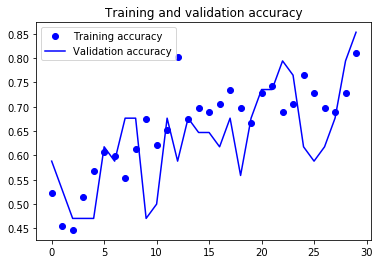

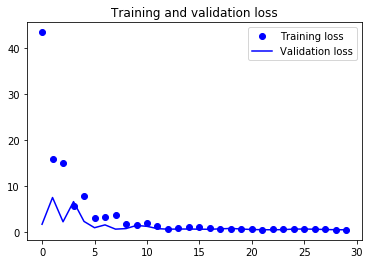

In [64]:
accuracy = lfo_train_dropout.history['accuracy']
val_accuracy = lfo_train_dropout.history['val_accuracy']
loss = lfo_train_dropout.history['loss']
val_loss = lfo_train_dropout.history['val_loss']
epochss = range(len(accuracy))
plt.plot(epochss, accuracy, 'bo', label='Training accuracy')
plt.plot(epochss, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochss, loss, 'bo', label='Training loss')
plt.plot(epochss, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [65]:
predicted_classes = model_.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==test_y)[0]
print(len(correct)/len(predicted_classes))

0.9166666666666666


In [67]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_y, predicted_classes, target_names=target_names))

C:\Users\Ahsen\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ahsen\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ahsen\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         0
     Class 1       1.00      0.92      0.96        12

    accuracy                           0.92        12
   macro avg       0.50      0.46      0.48        12
weighted avg       1.00      0.92      0.96        12

